In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.image as mpimg      
import matplotlib.pyplot as plt       
import matplotlib.patches as mpatches
from skimage import measure 
import scipy.ndimage as ndi 
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6) 

((325, 325), <matplotlib.image.AxesImage at 0x7f54f5cc81f0>)

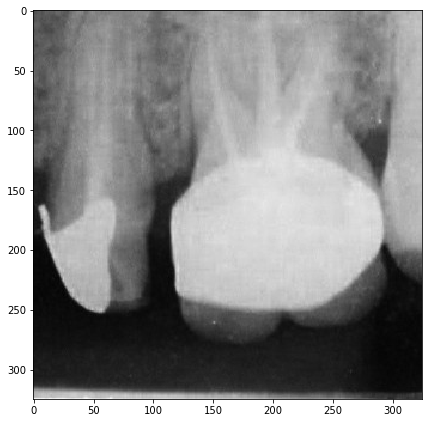

In [76]:
image = imread('Data/Img-Data/6-1.jpg', as_gray=True)
image.shape, imshow(image)

In [77]:
image.shape, image

((325, 325),
 array([[0.34117647, 0.32941176, 0.3372549 , ..., 0.76470588, 0.74901961,
         0.74117647],
        [0.30980392, 0.30588235, 0.32156863, ..., 0.75294118, 0.74509804,
         0.7372549 ],
        [0.30196078, 0.29803922, 0.31764706, ..., 0.74117647, 0.7372549 ,
         0.73333333],
        ...,
        [0.71764706, 0.70196078, 0.71764706, ..., 0.21568627, 0.22745098,
         0.23529412],
        [0.76078431, 0.74509804, 0.76078431, ..., 0.21568627, 0.23137255,
         0.23921569],
        [0.9372549 , 0.92941176, 0.94117647, ..., 0.21568627, 0.23137255,
         0.24705882]]))

In [79]:
features = np.reshape(image, (325*325))
features.shape, features

((105625,),
 array([0.34117647, 0.32941176, 0.3372549 , ..., 0.21568627, 0.23137255,
        0.24705882]))

In [80]:
image = imread('Data/Img-Data/6-1.jpg') 
image.shape

(325, 325, 3)

In [81]:
image = imread('Data/Img-Data/6-1.jpg')
feature_matrix = np.zeros((325*325)) 
feature_matrix.shape

(105625,)

In [89]:
for i in range(0,image.shape[1]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j]) + int(image[i,j]) + int(image[i,j]))/3)

TypeError: 'numpy.float64' object does not support item assignment

In [90]:
features = np.reshape(feature_matrix, (325*325)) 
features.shape

(105625,)

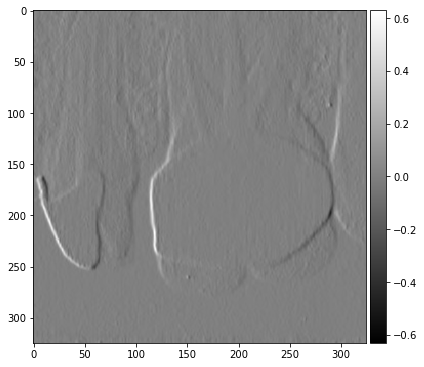

In [170]:
#reading the image 
image = imread('Data/Img-Data/6-1.jpg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

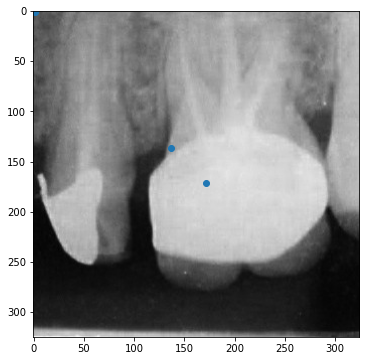

In [168]:
img = mpimg.imread('Data/Img-Data/6-1.jpg')

# using image processing module of scipy to find the center of the leaf
cx = ndi.center_of_mass(img)
cy = ndi.center_of_mass(img)

plt.imshow(img)  # show me the leaf
plt.scatter(cx,cy)           # show me its center
plt.show()

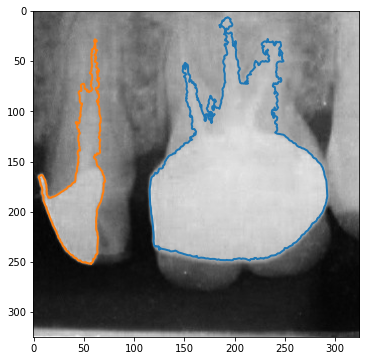

In [165]:
contours1 = measure.find_contours(image,0.7)
contours2 = measure.find_contours(image,0.6)

# from which we choose the longest one
contour1 = max(contours1, key=len)
contour2 = max(contours2, key=len)

# let us see the contour that we hopefully found
plt.plot(contour1[::,1], contour1[::,0], linewidth=2)  # (I will explain this [::,x] later)
plt.plot(contour2[::,1], contour2[::,0], linewidth=2)  # (I will explain this [::,x] later)
plt.imshow(img)
plt.show()

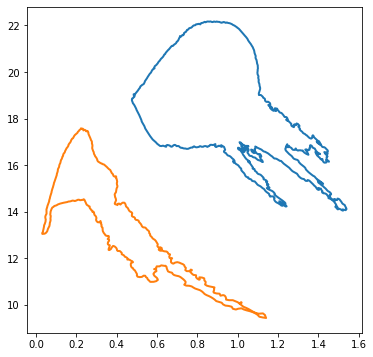

In [166]:
# cartesian to polar coordinates, just as the image shows above
def cart2pol(x, y):
    rho = np.sqrt(x + y)
    phi = np.arctan2(y, x)
    return [rho, phi]

# just calling the transformation on all pairs in the set
polar_contour1 = np.array([cart2pol(x, y) for x, y in contour1])
polar_contour2 = np.array([cart2pol(x, y) for x, y in contour2])

# and plotting the result
plt.plot(polar_contour1[::,1], polar_contour1[::,0], linewidth=2)
plt.plot(polar_contour2[::,1], polar_contour2[::,0], linewidth=2)

plt.show()